**TABLE OF CONTENT**

PART I:



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/A1-fyp2- churn/data for deep models.csv")
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,CLV,AvgMonthlyCharges
1583,1,0,1,1,0.083333,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0.034351,0.295161
6350,0,0,0,1,0.041667,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0.007035,0.105691
1033,1,0,1,0,0.861111,1,1,0,0,0,...,1,0,0,1,1,0,0,0,0.171497,0.084328
2500,0,0,1,1,0.694444,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0.441520,0.620088
5281,1,0,1,1,1.000000,1,1,1,1,0,...,0,0,0,1,0,1,0,0,0.562105,0.486321


**Train test split**

In [4]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

In [5]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
X_train.shape

(5634, 28)

In [7]:
X_test.shape

(1409, 28)

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**LSTM**

In [9]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reshape the input data for LSTM
# LSTM expects input in 3D format: (samples, timesteps, features)

# Reshape the training and testing data for LSTM (1 timestep in this case)
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()

# Add a Bidirectional LSTM layer
#model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(LSTM(64, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))

# Add Dropout to prevent overfitting
model.add(Dropout(0.3))

# Add a Dense output layer with a sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history = model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32")

# Evaluate the model
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"LSTM Accuracy: {accuracy_lstm * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lstm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.7380 - loss: 0.5626 - val_accuracy: 0.7986 - val_loss: 0.4346
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7835 - loss: 0.4465 - val_accuracy: 0.8012 - val_loss: 0.4230
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7892 - loss: 0.4340 - val_accuracy: 0.8083 - val_loss: 0.4173
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7970 - loss: 0.4269 - val_accuracy: 0.8119 - val_loss: 0.4166
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8014 - loss: 0.4113 - val_accuracy: 0.8128 - val_loss: 0.4134
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7913 - loss: 0.4352 - val_accuracy: 0.8119 - val_loss: 0.4127
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7960 - loss: 0.4279 - val_accuracy: 0.8128 - val_loss: 0.4118
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7975 - loss: 0.4311 - val_accurac

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM ROC-AUC Score: 0.86


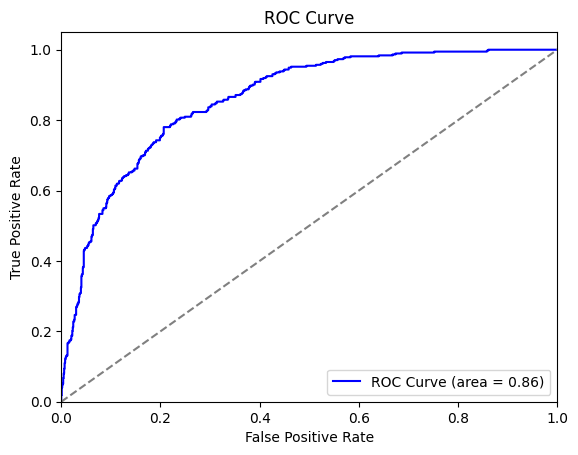

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC-AUC score
y_pred_prob_lstm = model.predict(X_test_lstm)  # Get predicted probabilities
roc_auc_lstm = roc_auc_score(y_test, y_pred_prob_lstm)
print(f"LSTM ROC-AUC Score: {roc_auc_lstm:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lstm)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [11]:
# Train with larger batch size
model_batch_64 = Sequential()
model_batch_64.add(LSTM(64, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_batch_64.add(Dropout(0.3))
model_batch_64.add(Dense(1, activation='sigmoid'))

# Compile and train
model_batch_64.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_batch_64 = model_batch_64.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate model
y_pred_batch_64 = (model_batch_64.predict(X_test_lstm) > 0.5).astype("int32")
accuracy_batch_64 = accuracy_score(y_test, y_pred_batch_64)
print(f"Accuracy (Batch size 64): {accuracy_batch_64 * 100:.2f}%")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6876 - loss: 0.6144 - val_accuracy: 0.7516 - val_loss: 0.4824
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7586 - loss: 0.4861 - val_accuracy: 0.7959 - val_loss: 0.4324
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7846 - loss: 0.4554 - val_accuracy: 0.8057 - val_loss: 0.4245
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7990 - loss: 0.4353 - val_accuracy: 0.8021 - val_loss: 0.4204
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7880 - loss: 0.4322 - val_accuracy: 0.8012 - val_loss: 0.4194
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7996 - loss: 0.4203 - val_accuracy: 0.8119 - val_loss: 0.4163
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7974 - loss: 0.4223 - val_accuracy: 0.8119 - val_loss: 0.4151
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7946 - loss: 0.4308 - val_accuracy: 0.8101 - val_loss: 0.4141
Ep

In [12]:
# Train with more LSTM units
model_lstm_128 = Sequential()
model_lstm_128.add(LSTM(128, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm_128.add(Dropout(0.3))
model_lstm_128.add(Dense(1, activation='sigmoid'))

# Compile and train
model_lstm_128.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm_128 = model_lstm_128.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate model
y_pred_lstm_128 = (model_lstm_128.predict(X_test_lstm) > 0.5).astype("int32")
accuracy_lstm_128 = accuracy_score(y_test, y_pred_lstm_128)
print(f"Accuracy (LSTM units 128): {accuracy_lstm_128 * 100:.2f}%")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7031 - loss: 0.5721 - val_accuracy: 0.7995 - val_loss: 0.4277
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7711 - loss: 0.4417 - val_accuracy: 0.7995 - val_loss: 0.4231
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7886 - loss: 0.4310 - val_accuracy: 0.8021 - val_loss: 0.4166
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7906 - loss: 0.4277 - val_accuracy: 0.8128 - val_loss: 0.4150
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7992 - loss: 0.4307 - val_accuracy: 0.8101 - val_loss: 0.4144
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7913 - loss: 0.4191 - val_accuracy: 0.8110 - val_loss: 0.4107
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7894 - loss: 0.4278 - val_accuracy: 0.8137 - val_loss: 0.4098
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7997 - loss: 0.4188 - val_accuracy: 0.7915 - val

In [13]:
# Train with more LSTM units
model_lstm_128 = Sequential()
model_lstm_128.add(LSTM(128, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm_128.add(Dropout(0.3))
model_lstm_128.add(Dense(1, activation='sigmoid'))

# Compile and train
model_lstm_128.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm_128 = model_lstm_128.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate model
y_pred_lstm_128 = (model_lstm_128.predict(X_test_lstm) > 0.5).astype("int32")
accuracy_lstm_128 = accuracy_score(y_test, y_pred_lstm_128)
print(f"Accuracy (LSTM units 128): {accuracy_lstm_128 * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7288 - loss: 0.5640 - val_accuracy: 0.7977 - val_loss: 0.4295
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7862 - loss: 0.4404 - val_accuracy: 0.8066 - val_loss: 0.4193
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7919 - loss: 0.4343 - val_accuracy: 0.8092 - val_loss: 0.4172
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7937 - loss: 0.4290 - val_accuracy: 0.8101 - val_loss: 0.4133
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7931 - loss: 0.4296 - val_accuracy: 0.8110 - val_loss: 0.4138
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7914 - loss: 0.4375 - val_accuracy: 0.8101 - val_loss: 0.4137
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7996 - loss: 0.4202 - val_accuracy: 0.8092 - val_loss: 0.4096
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8021 - loss: 0.4217 - val_accuracy: 0

In [14]:
# Train with higher dropout rate
model_dropout_05 = Sequential()
model_dropout_05.add(LSTM(64, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_dropout_05.add(Dropout(0.5))
model_dropout_05.add(Dense(1, activation='sigmoid'))

# Compile and train
model_dropout_05.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_dropout_05 = model_dropout_05.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate model
y_pred_dropout_05 = (model_dropout_05.predict(X_test_lstm) > 0.5).astype("int32")
accuracy_dropout_05 = accuracy_score(y_test, y_pred_dropout_05)
print(f"Accuracy (Dropout 0.5): {accuracy_dropout_05 * 100:.2f}%")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6907 - loss: 0.5871 - val_accuracy: 0.7924 - val_loss: 0.4418
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7923 - loss: 0.4428 - val_accuracy: 0.8039 - val_loss: 0.4226
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7900 - loss: 0.4303 - val_accuracy: 0.8048 - val_loss: 0.4174
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7819 - loss: 0.4472 - val_accuracy: 0.8110 - val_loss: 0.4152
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7968 - loss: 0.4172 - val_accuracy: 0.8119 - val_loss: 0.4136
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7993 - loss: 0.4261 - val_accuracy: 0.8119 - val_loss: 0.4126
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7957 - loss: 0.4242 - val_accuracy: 0.8057 - val_loss: 0.4120
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7912 - loss: 0.4364 - val_accuracy: 0.8110 - val

In [15]:
# Train with RMSprop optimizer
model_rmsprop = Sequential()
model_rmsprop.add(LSTM(64, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_rmsprop.add(Dropout(0.3))
model_rmsprop.add(Dense(1, activation='sigmoid'))

# Compile and train
model_rmsprop.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate model
y_pred_rmsprop = (model_rmsprop.predict(X_test_lstm) > 0.5).astype("int32")
accuracy_rmsprop = accuracy_score(y_test, y_pred_rmsprop)
print(f"Accuracy (RMSprop optimizer): {accuracy_rmsprop * 100:.2f}%")



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7267 - loss: 0.5730 - val_accuracy: 0.7933 - val_loss: 0.4379
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7754 - loss: 0.4496 - val_accuracy: 0.8004 - val_loss: 0.4207
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7901 - loss: 0.4331 - val_accuracy: 0.8075 - val_loss: 0.4171
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7999 - loss: 0.4218 - val_accuracy: 0.8083 - val_loss: 0.4149
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7940 - loss: 0.4192 - val_accuracy: 0.8110 - val_loss: 0.4141
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7951 - loss: 0.4190 - val_accuracy: 0.8119 - val_loss: 0.4125
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7865 - loss: 0.4372 - val_accuracy: 0.8083 - val_loss: 0.4151
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7915 - loss: 0.4311 - val_accuracy: 0.8110 - val_

In [16]:

model_acti = Sequential()
model_acti.add(LSTM(64, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_acti.add(Dropout(0.3))
model_acti.add(Dense(1, activation='tanh'))

# Compile and train
model_acti.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_acti = model_rmsprop.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate model
y_pred_acti = (model_rmsprop.predict(X_test_lstm) > 0.5).astype("int32")
accuracy_acti = accuracy_score(y_test, y_pred_acti)
print(f"Accuracy (Activation): {accuracy_acti * 100:.2f}%")

Epoch 1/10
 19/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.4230 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7961 - loss: 0.4256 - val_accuracy: 0.7968 - val_loss: 0.4119
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8015 - loss: 0.4121 - val_accuracy: 0.8101 - val_loss: 0.4088
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7960 - loss: 0.4289 - val_accuracy: 0.8066 - val_loss: 0.4075
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8012 - loss: 0.4241 - val_accuracy: 0.8057 - val_loss: 0.4067
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8004 - loss: 0.4043 - val_accuracy: 0.8101 - val_loss: 0.4067
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7974 - loss: 0.4319 - val_accuracy: 0.8110 - val_loss: 0.4067
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8007 - loss: 0.4077 - val_accuracy: 0.8066 - val_loss: 0.4057
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7967 - loss: 0.4137 - val_accuracy: 0.8092 - val_

----------------------------------------------------------

**BI-LSTM**

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7467 - loss: 0.5456 - val_accuracy: 0.7835 - val_loss: 0.4371
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7869 - loss: 0.4407 - val_accuracy: 0.8092 - val_loss: 0.4169
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7857 - loss: 0.4309 - val_accuracy: 0.8092 - val_loss: 0.4139
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7928 - loss: 0.4269 - val_accuracy: 0.8119 - val_loss: 0.4122
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7913 - loss: 0.4258 - val_accuracy: 0.8101 - val_loss: 0.4116
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7903 - loss: 0.4349 - val_accuracy: 0.8092 - val_loss: 0.4151
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7748 - loss: 0.4552 - val_accuracy: 0.8119 - val_loss: 0.4122
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7967 - loss: 0.4338 - val_accuracy: 0.8092 - val_

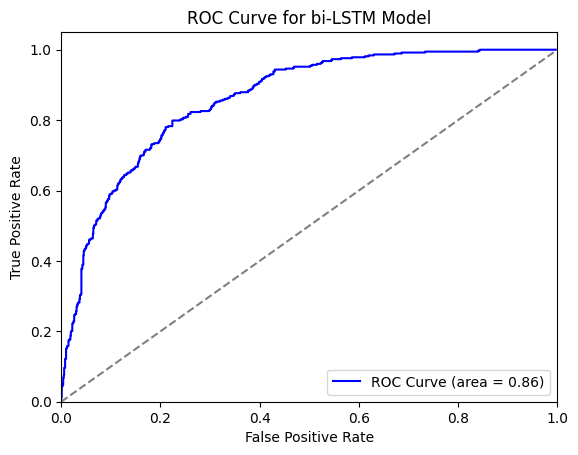

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Reshape the training and testing data for LSTM (1 timestep in this case)
X_train_bilstm = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_bilstm = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the BiLSTM model using a different variable name (bilstm_model)
bilstm_model = Sequential()

# Add a Bidirectional LSTM layer
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train_bilstm.shape[1], X_train_bilstm.shape[2])))

# Add Dropout to prevent overfitting
bilstm_model.add(Dropout(0.3))

# Add a Dense output layer with a sigmoid activation function for binary classification
bilstm_model.add(Dense(1, activation='sigmoid'))

# Compile the BiLSTM model
bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the BiLSTM model
history_bilstm = bilstm_model.fit(X_train_bilstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_prob_bilstm = bilstm_model.predict(X_test_bilstm)  # Get predicted probabilities
y_pred_bilstm = (y_pred_prob_bilstm > 0.5).astype("int32")

# Evaluate the BiLSTM model
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print(f"bi-LSTM Accuracy: {accuracy_bilstm * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bilstm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bilstm))

# Calculate ROC-AUC score
roc_auc_bilstm = roc_auc_score(y_test, y_pred_prob_bilstm)
print(f"bi-LSTM ROC-AUC Score: {roc_auc_bilstm:.2f}")

# Plot ROC curve
fpr_bilstm, tpr_bilstm, _ = roc_curve(y_test, y_pred_prob_bilstm)
plt.figure()
plt.plot(fpr_bilstm, tpr_bilstm, color='blue', label=f'ROC Curve (area = {roc_auc_bilstm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for bi-LSTM Model')
plt.legend(loc='lower right')
plt.show()




**MLP**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7798 - loss: 0.4744 - val_accuracy: 0.7977 - val_loss: 0.4198
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7949 - loss: 0.4375 - val_accuracy: 0.8092 - val_loss: 0.4180
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7816 - loss: 0.4442 - val_accuracy: 0.7977 - val_loss: 0.4129
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7946 - loss: 0.4372 - val_accuracy: 0.8030 - val_loss: 0.4126
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7903 - loss: 0.4407 - val_accuracy: 0.8030 - val_loss: 0.4142
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7975 - loss: 0.4262 - val_accuracy: 0.7995 - val_loss: 0.4136
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8075 - loss: 0.4185 - val_accuracy: 0.7995 - val_loss: 0.4171


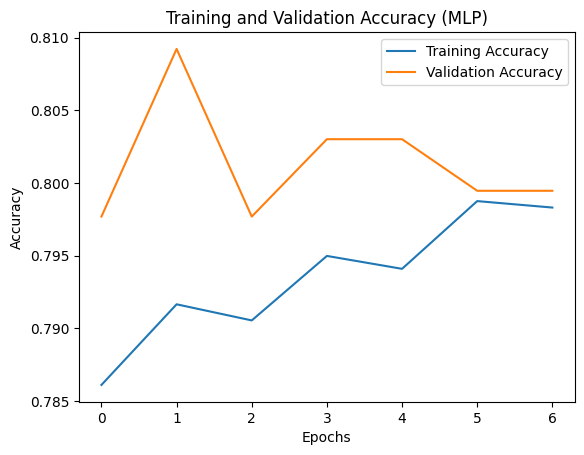

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MLP Accuracy: 80.62%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.57      0.61       373

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[923 113]
 [160 213]]
MLP ROC-AUC Score: 0.85


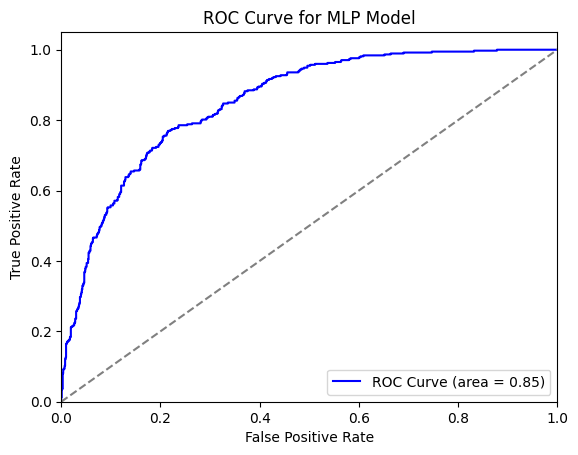

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prepare the training and test data for MLP
X_train_mlp = np.array(X_train)
X_test_mlp = np.array(X_test)

# Define the MLP model
mlp_model = Sequential()

# Input layer with 256 units and 'tanh' activation function
mlp_model.add(Dense(256, activation='tanh', input_shape=(X_train_mlp.shape[1],)))

# Add Dropout to prevent overfitting
mlp_model.add(Dropout(0.3))

# Second hidden layer with 128 units and 'tanh' activation
mlp_model.add(Dense(128, activation='tanh'))

# Add Dropout
mlp_model.add(Dropout(0.3))

# Third hidden layer with 64 units and Leaky ReLU activation
mlp_model.add(Dense(64))
mlp_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))

# Output layer for binary classification with sigmoid activation
mlp_model.add(Dense(1, activation='sigmoid'))

# Compile the MLP model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement EarlyStopping for MLP
early_stopping_mlp = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the MLP model
history_mlp = mlp_model.fit(X_train_mlp, y_train,
                            epochs=50,
                            batch_size=32,
                            validation_split=0.2,
                            callbacks=[early_stopping_mlp],
                            verbose=1)

# Visualize Training History (Accuracy per Epoch)
plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (MLP)')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred_prob_mlp = mlp_model.predict(X_test_mlp)  # Get predicted probabilities
y_pred_mlp = (y_pred_prob_mlp > 0.5).astype("int32")

# Evaluate the MLP model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

# Calculate ROC-AUC score for MLP
roc_auc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)
print(f"MLP ROC-AUC Score: {roc_auc_mlp:.2f}")

# Plot ROC curve for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_prob_mlp)
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='blue', label=f'ROC Curve (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Model')
plt.legend(loc='lower right')
plt.show()



**CNN**

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7327 - loss: 0.5360 - val_accuracy: 0.7968 - val_loss: 0.4314
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7776 - loss: 0.4519 - val_accuracy: 0.8048 - val_loss: 0.4185
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7928 - loss: 0.4322 - val_accuracy: 0.8048 - val_loss: 0.4141
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7825 - loss: 0.4394 - val_accuracy: 0.8048 - val_loss: 0.4135
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7933 - loss: 0.4339 - val_accuracy: 0.8048 - val_loss: 0.4149
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7888 - loss: 0.4402 - val_accuracy: 0.7986 - val_loss: 0.4281
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8056 - loss: 0.4123 - val_accuracy: 0.8092 - val_loss: 0.4102
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8008 - loss: 0.4188 - val_accuracy: 0.8110 - val_

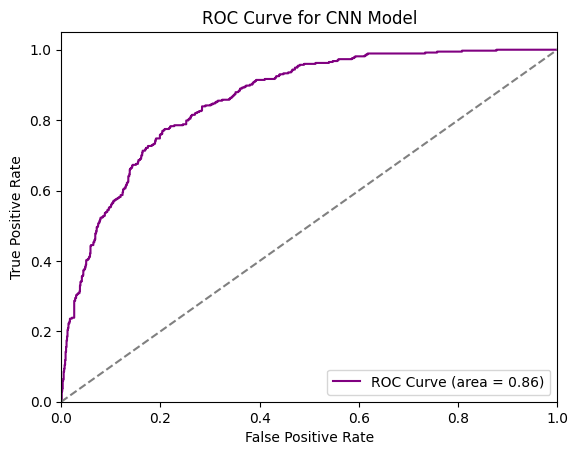

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Reshape the input data for CNN (CNN expects input in 3D format: (samples, timesteps, features))
X_train_cnn = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model using a different variable name (cnn_model)
cnn_model = Sequential()

# Add a 1D convolutional layer with 64 filters, kernel size 3, and ReLU activation
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))

# Add a max pooling layer
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output before feeding into the dense layers
cnn_model.add(Flatten())

# Add a dropout layer to prevent overfitting
cnn_model.add(Dropout(0.3))

# Add a dense layer with 64 units and ReLU activation
cnn_model.add(Dense(64, activation='relu'))

# Add the output layer with a sigmoid activation for binary classification
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_prob_cnn = cnn_model.predict(X_test_cnn)  # Get predicted probabilities
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype("int32")

# Evaluate the CNN model
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"CNN Accuracy: {accuracy_cnn * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cnn))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_cnn))

# Calculate ROC-AUC score
roc_auc_cnn = roc_auc_score(y_test, y_pred_prob_cnn)
print(f"CNN ROC-AUC Score: {roc_auc_cnn:.2f}")

# Plot ROC curve
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_prob_cnn)
plt.figure()
plt.plot(fpr_cnn, tpr_cnn, color='purple', label=f'ROC Curve (area = {roc_auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc='lower right')
plt.show()


**ANN**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7187 - loss: 0.5222 - val_accuracy: 0.8048 - val_loss: 0.4157
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7944 - loss: 0.4328 - val_accuracy: 0.8057 - val_loss: 0.4108
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7947 - loss: 0.4304 - val_accuracy: 0.8057 - val_loss: 0.4095
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7950 - loss: 0.4243 - val_accuracy: 0.8004 - val_loss: 0.4082
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8067 - loss: 0.4103 - val_accuracy: 0.8030 - val_loss: 0.4073
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8032 - loss: 0.4213 - val_accuracy: 0.8066 - val_loss: 0.4052
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8062 - loss: 0.4129 - val_accuracy: 0.8021 - val_loss: 0.4065
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7977 - loss: 0.4176 - val_accuracy: 0.8030 - val_

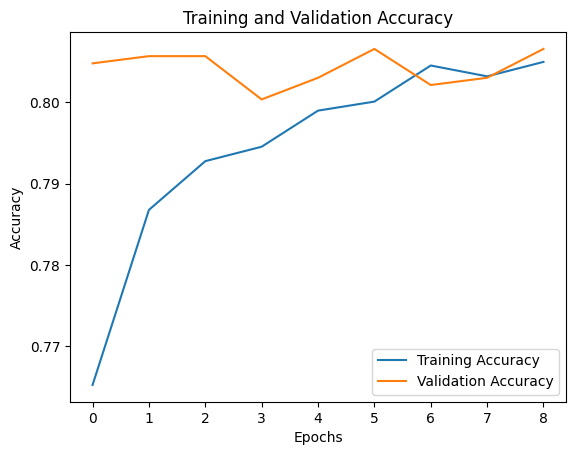

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
ANN Accuracy: 81.19%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[944  92]
 [173 200]]
ANN ROC-AUC Score: 0.86


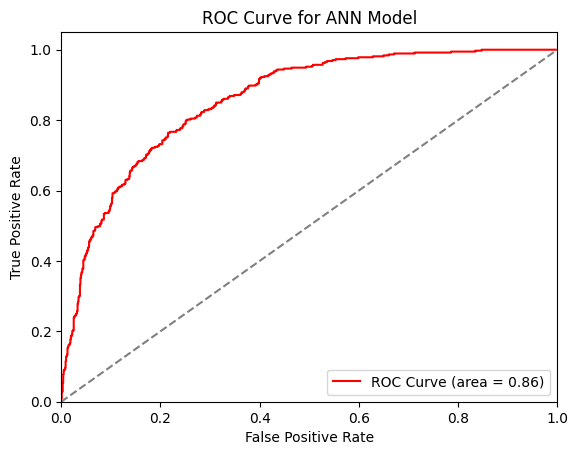

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# No need to reshape the input for ANN since ANN expects 2D data: (samples, features)
X_train_ann = np.array(X_train)
X_test_ann = np.array(X_test)

# Define the ANN model using a different variable name (ann_model)
ann_model = Sequential()

# Add a Dense input layer (hidden layer 1) with 128 units and ReLU activation
ann_model.add(Dense(128, activation='relu', input_shape=(X_train_ann.shape[1],)))

# Add Dropout to prevent overfitting
ann_model.add(Dropout(0.3))

# Add another Dense hidden layer (hidden layer 2) with 64 units and ReLU activation
ann_model.add(Dense(64, activation='relu'))

# Add the output layer with a sigmoid activation for binary classification
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the ANN model with Early Stopping
history_ann = ann_model.fit(X_train_ann, y_train,
                            epochs=50,  # Set a higher number of epochs
                            batch_size=32,
                            validation_split=0.2,
                            callbacks=[early_stopping],
                            verbose=1)

# Visualize Training History (Accuracy per Epoch)
plt.plot(history_ann.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred_prob_ann = ann_model.predict(X_test_ann)  # Get predicted probabilities
y_pred_ann = (y_pred_prob_ann > 0.5).astype("int32")

# Evaluate the ANN model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"ANN Accuracy: {accuracy_ann * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))

# Calculate ROC-AUC score
roc_auc_ann = roc_auc_score(y_test, y_pred_prob_ann)
print(f"ANN ROC-AUC Score: {roc_auc_ann:.2f}")

# Plot ROC curve
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_prob_ann)
plt.figure()
plt.plot(fpr_ann, tpr_ann, color='red', label=f'ROC Curve (area = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN Model')
plt.legend(loc='lower right')
plt.show()



In [21]:
# Compare results for all models (LSTM, BiLSTM, CNN, and ANN)

# Store the accuracy scores in a dictionary
accuracy_scores = {
    "LSTM": accuracy_lstm,
    "BiLSTM": accuracy_bilstm,
    "MLP": accuracy_mlp,
    "CNN": accuracy_cnn,
    "ANN": accuracy_ann
}

# Print accuracy comparison
print("Model Accuracy Comparison:")
for model, accuracy in accuracy_scores.items():
    print(f"{model}: {accuracy * 100:.2f}%")






Model Accuracy Comparison:
LSTM: 81.62%
BiLSTM: 81.41%
MLP: 80.62%
CNN: 80.84%
ANN: 81.19%


In [22]:
# Store the ROC-AUC scores in a dictionary
roc_auc_scores = {
    "LSTM": roc_auc_lstm,
    "BiLSTM": roc_auc_bilstm,
    "MLP": roc_auc_mlp,
    "CNN": roc_auc_cnn,
    "ANN": roc_auc_ann
}

# Print ROC-AUC comparison
print("Model ROC-AUC Score Comparison:")
for model, roc_auc in roc_auc_scores.items():
    print(f"{model}: {roc_auc:.2f}")


Model ROC-AUC Score Comparison:
LSTM: 0.86
BiLSTM: 0.86
MLP: 0.85
CNN: 0.86
ANN: 0.86


In [23]:

# Print classification reports for all models
print("\nClassification Reports:")
print("\nLSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))

print("\nBiLSTM Classification Report:")
print(classification_report(y_test, y_pred_bilstm))

print("\nMLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

print("\nCNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))

print("\nANN Classification Report:")
print(classification_report(y_test, y_pred_ann))

# Print confusion matrices for all models
print("\nConfusion Matrices:")
print("\nLSTM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm))

print("\nBiLSTM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bilstm))

print("\nMLP Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

print("\nCNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cnn))

print("\nANN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))


Classification Reports:

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


BiLSTM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1036
           1       0.66      0.60      0.63       373

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.75      1409
weighted avg       0.81      0.81      0.81      1409


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.57      0.61       373

    accuracy                           0.81      1409
   macro avg   